Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

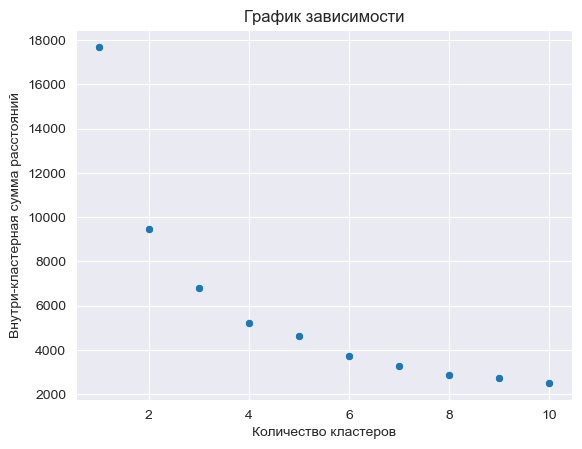

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans


PATH = "Breast_cancer_data.csv" 
dataset = pd.read_csv(PATH)

factorization_table = {} 
dataset.index = [index for index in range(len(dataset))] 
dataset

dataset = dataset.drop(["mean_area","mean_perimeter"], axis = 1)

for column in dataset: 
    if type(dataset[column][0]) is str: 
        dataset[column] = pd.factorize(dataset[column])[0]

inertia = [] 
for i in range(1, 11): 
    k_means = KMeans(n_clusters=i, init= 'k-means++', n_init = 1) 
    k_means.fit(dataset)
    inertia.append(k_means.inertia_) 
sns.set_style('darkgrid') 
sns.scatterplot( x=[x for x in range(1, 11)], y=inertia, ) 
plt.title('График зависимости') 
plt.xlabel('Количество кластеров') 
plt.ylabel('Внутри-кластерная сумма расстояний')


,mean_radius,mean_texture,diagnosis
mean_radius,1.000000,0.323782,-0.730029
mean_texture,0.323782,1.000000,-0.415185
diagnosis,-0.730029,-0.415185,1.000000


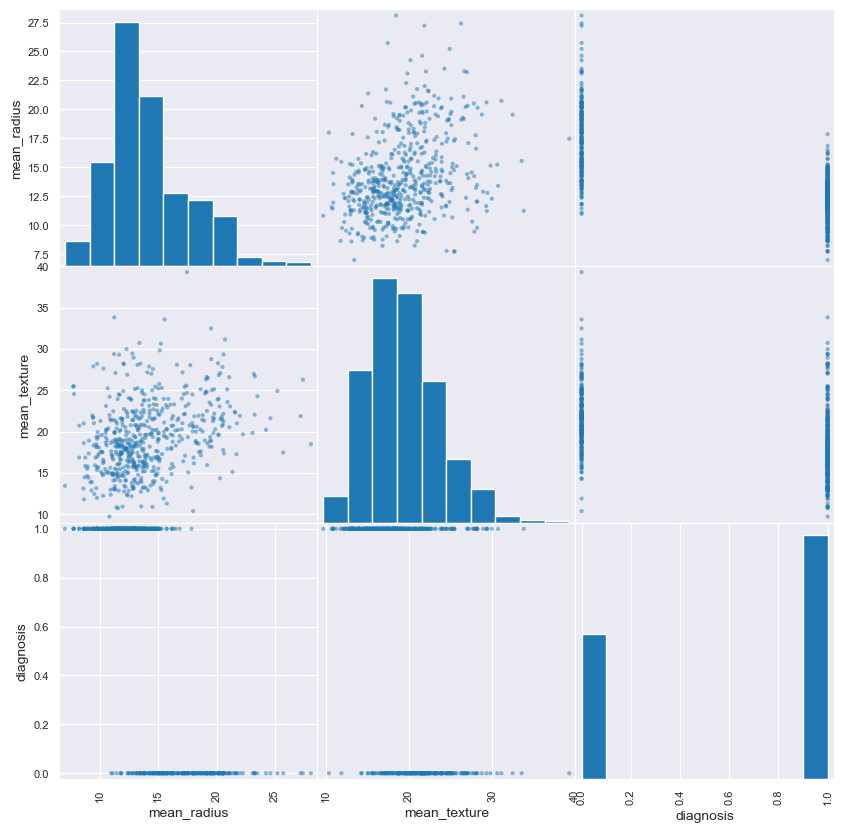

In [10]:
from pandas.plotting import scatter_matrix
col = ["mean_radius","mean_texture", "diagnosis"]
scatter_matrix(dataset[col], alpha=0.5, figsize=(10,10))
dataset[col].corr()

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
dataset.round(2).head()
x = pd.DataFrame(dataset, columns = ["mean_radius", "mean_texture"])
y_pred = kmeans.fit_predict(x)

In [7]:
CLUSTERS = 5
model = KMeans( n_clusters=CLUSTERS ) 
model.fit( dataset.drop( "diagnosis", axis=1, ) ) 
clusters = pd.DataFrame( columns=dataset.columns.drop("diagnosis"), data=model.cluster_centers_ ) 
clusters["Amount"] = np.unique( model.labels_, return_counts=True )[1] 
clusters



,mean_radius,mean_texture,mean_smoothness,Amount
0,12.527243,14.653905,0.095463,169
1,19.480732,26.859512,0.101456,41
2,19.058265,20.004286,0.100624,98
3,13.126468,24.915974,0.092891,77
4,12.196560,19.125598,0.095230,184


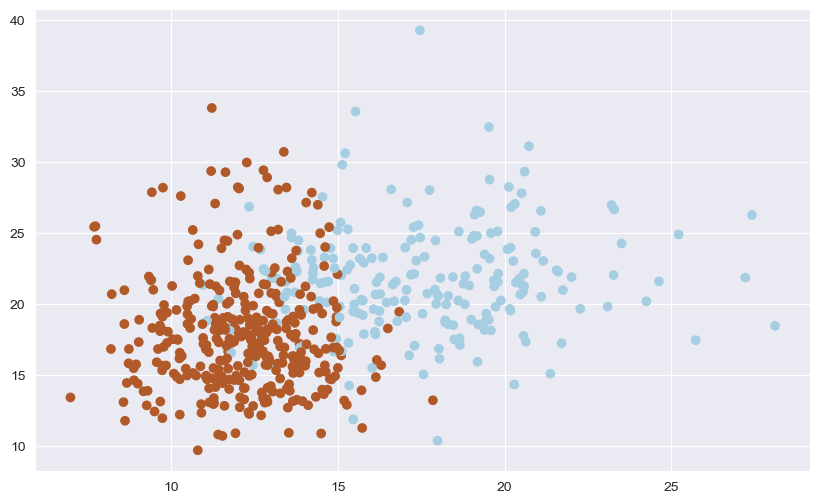

In [8]:
plt.figure(figsize = (10,6))

plt.scatter(dataset["mean_radius"], dataset["mean_texture"], c = dataset["diagnosis"], cmap="Paired" )

KMeans(n_clusters=5, n_init=10, random_state=42)

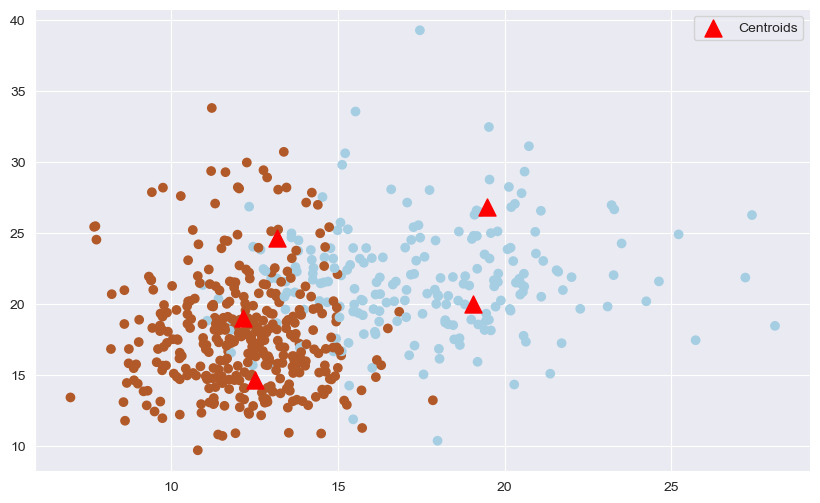

In [9]:
plt.figure(figsize = (10,6))
plt.scatter(dataset["mean_radius"], dataset["mean_texture"], c = dataset["diagnosis"], cmap="Paired" )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')

plt.legend(loc = 'upper right')
kmeans